In [3]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'

dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/h0_mcmc_zcos.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'delta' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'h0_mcmc_zcos.csv not found.')
        continue
    
data = pd.DataFrame(dict)

data

0313 h0_mcmc_zcos.csv not found.
0314 h0_mcmc_zcos.csv not found.
0315 h0_mcmc_zcos.csv not found.
0316 h0_mcmc_zcos.csv not found.
0317 h0_mcmc_zcos.csv not found.
0318 h0_mcmc_zcos.csv not found.
0319 h0_mcmc_zcos.csv not found.
0320 h0_mcmc_zcos.csv not found.
0321 h0_mcmc_zcos.csv not found.
0322 h0_mcmc_zcos.csv not found.
0323 h0_mcmc_zcos.csv not found.
0324 h0_mcmc_zcos.csv not found.
0325 h0_mcmc_zcos.csv not found.
0326 h0_mcmc_zcos.csv not found.
0327 h0_mcmc_zcos.csv not found.
0328 h0_mcmc_zcos.csv not found.
0329 h0_mcmc_zcos.csv not found.
0330 h0_mcmc_zcos.csv not found.
0331 h0_mcmc_zcos.csv not found.
0332 h0_mcmc_zcos.csv not found.
0333 h0_mcmc_zcos.csv not found.
0334 h0_mcmc_zcos.csv not found.
0335 h0_mcmc_zcos.csv not found.
0336 h0_mcmc_zcos.csv not found.
0337 h0_mcmc_zcos.csv not found.
0338 h0_mcmc_zcos.csv not found.
0339 h0_mcmc_zcos.csv not found.
0340 h0_mcmc_zcos.csv not found.
0341 h0_mcmc_zcos.csv not found.
0342 h0_mcmc_zcos.csv not found.
0343 h0_mc

,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone
0,LX-T,0.025123,0.017087,0.020573,-36.026685,55.208900,42.762177,-16.513862,34.373614,32.656040,90.706541,0
1,YSZ-T,0.009233,0.006463,0.009124,-71.880368,111.834563,112.288691,-35.761972,36.623561,54.894073,110.989831,0
2,M-T,0.010210,0.006585,0.007429,-60.060172,98.388534,41.025858,-30.990664,33.198425,29.605302,93.385491,0
3,LX-T,0.023652,0.013631,0.013397,36.007646,108.669363,97.547037,59.956079,32.371926,20.760638,96.549871,1
4,YSZ-T,0.008501,0.006037,0.009279,-119.959090,110.383201,98.759724,-15.945348,49.083796,57.196887,115.206137,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,M-T,0.004247,0.002959,0.004713,-59.970187,125.291669,122.028613,-17.531467,47.955607,60.236645,111.866679,1466
2812,LX-T,0.053995,0.020538,0.020028,35.671245,273.835875,15.424671,3.201804,13.918055,14.430420,78.921712,1467
2813,YSZ-T,0.008157,0.005857,0.009400,60.018684,88.032423,89.398287,3.847915,50.808834,51.651922,102.559105,1467
2814,M-T,0.014783,0.008905,0.008313,47.687649,25.765989,32.812327,-0.110425,20.100904,21.840932,91.099927,1467


In [6]:
# Get the significance
significance = data['delta'] / data['delta_err_lower']
data['Significance'] = significance
data['DeltaH0'] = data['delta'] * 2 * 100 # to percentage

In [20]:
data.to_csv('../data/analysis_all/h0_mc_zcos.csv')

## Plot

In [5]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_zcos.csv')

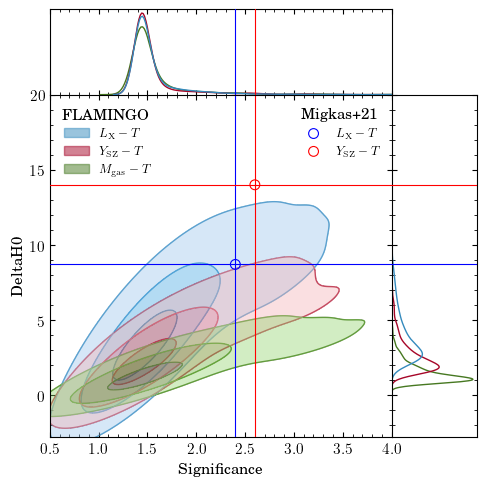

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')

colors = ['#348ABD', '#A60628', '#467821']
sns.set_palette(colors)
# Create the 2D KDE plot
g = sns.JointGrid(data=data, 
                    x='Significance',
                    y='DeltaH0', 
                    hue='scaling_relation',
                    space=0,
                    ratio=4,
                    # marginal_ticks=True,
                    height=5,
                    # dpi=300
                    xlim=(0.5, 4.0),
                    ylim=(-2.8, 20),
                    )

# kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
for relation, color in zip(['LX-T', 'YSZ-T', 'M-T'], 
                            colors):
    
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                x='Significance',
                y='DeltaH0', 
                #hue='Relations',
                color=color,
                fill=False, 
                levels=(0.011, 0.14, 0.61, 1.),
                bw_adjust=3.2,
                zorder=1,
                ax=g.ax_joint
                )
    sns.kdeplot(data=data[data['scaling_relation'] == relation], 
                x='Significance',
                y='DeltaH0', 
                #hue='Relations',
                color=color,
                fill=True, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=3.2,
                zorder=2,
                alpha=0.4,
                ax=g.ax_joint,
                )

# plot marginal plots
g.plot_marginals(sns.kdeplot,
                fill=False
                )

# M21 results
x_point = 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle='solid', color='b', zorder=3, linewidth=.8)
line0 = g.ax_joint.scatter(x_point, y_point, marker='o', facecolors='none', linewidth=.8, edgecolors='b', s=50, linewidths=1 ,label='$L_\\mathrm{{X}}-T$', zorder=10)

x_point = 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle='solid', color='r', zorder=3, linewidth=.8)
line1 = g.ax_joint.scatter(x_point, y_point, marker='o', facecolors='none', linewidth=.8, edgecolors='r', s=50, linewidths=1 ,label='$Y_\\mathrm{{SZ}}-T$', zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor='#348ABD', edgecolor='#348ABD', label='$L_\\mathrm{X}-T$', alpha=0.5),
                           Patch(facecolor='#A60628', edgecolor='#A60628', label='$Y_\\mathrm{SZ}-T$', alpha=0.5),
                           Patch(facecolor='#467821', edgecolor='#467821', label='$M_\\mathrm{gas}-T$', alpha=0.5)]

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

# plt.savefig('./to_paper/h0mc_zcos_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()